In [5]:
from keras.datasets import imdb
import keras.utils as ku
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = ku.pad_sequences(input_train, maxlen=maxlen)
input_test = ku.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 [==============================] - 45s 264ms/step - loss: 0.6428 - acc: 0.6140 - val_loss: 0.5810 - val_acc: 0.6980
Epoch 2/10
157/157 [==============================] - 33s 208ms/step - loss: 0.4023 - acc: 0.8302 - val_loss: 0.4389 - val_acc: 0.8030
Epoch 3/10
157/157 [==============================] - 27s 175ms/step - loss: 0.2957 - acc: 0.8803 - val_loss: 0.4572 - val_acc: 0.7880
Epoch 4/10
157/157 [==============================] - 33s 209ms/step - loss: 0.2225 - acc: 0.9143 - val_loss: 0.4441 - val_acc: 0.8172
Epoch 5/10
157/157 [==============================] - 35s 222ms/step - loss: 0.1624 - acc: 0.9423 - val_loss: 0.4520 - val_acc: 0.8034
Epoch 6/10
157/157 [==============================] - 35s 222ms/step - loss: 0.1110 - acc: 0.9619 - val_loss: 0.4075 - val_acc: 0.8556
Epoch 7/10
157/157 [=================

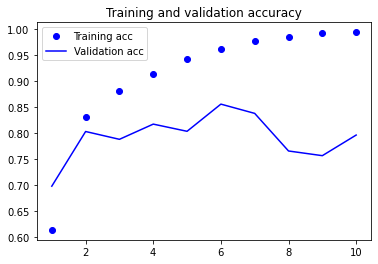

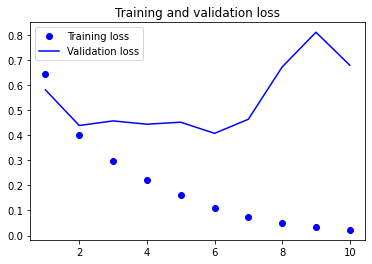

In [9]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.datasets import imdb
import keras.utils as ku
import matplotlib.pyplot as plt
import keras as kr

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = ku.pad_sequences(input_train, maxlen=maxlen)
input_test = ku.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
model = kr.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()